<a href="https://colab.research.google.com/github/mfinke17/Python/blob/main/AR_JMmanuscripttable4figure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


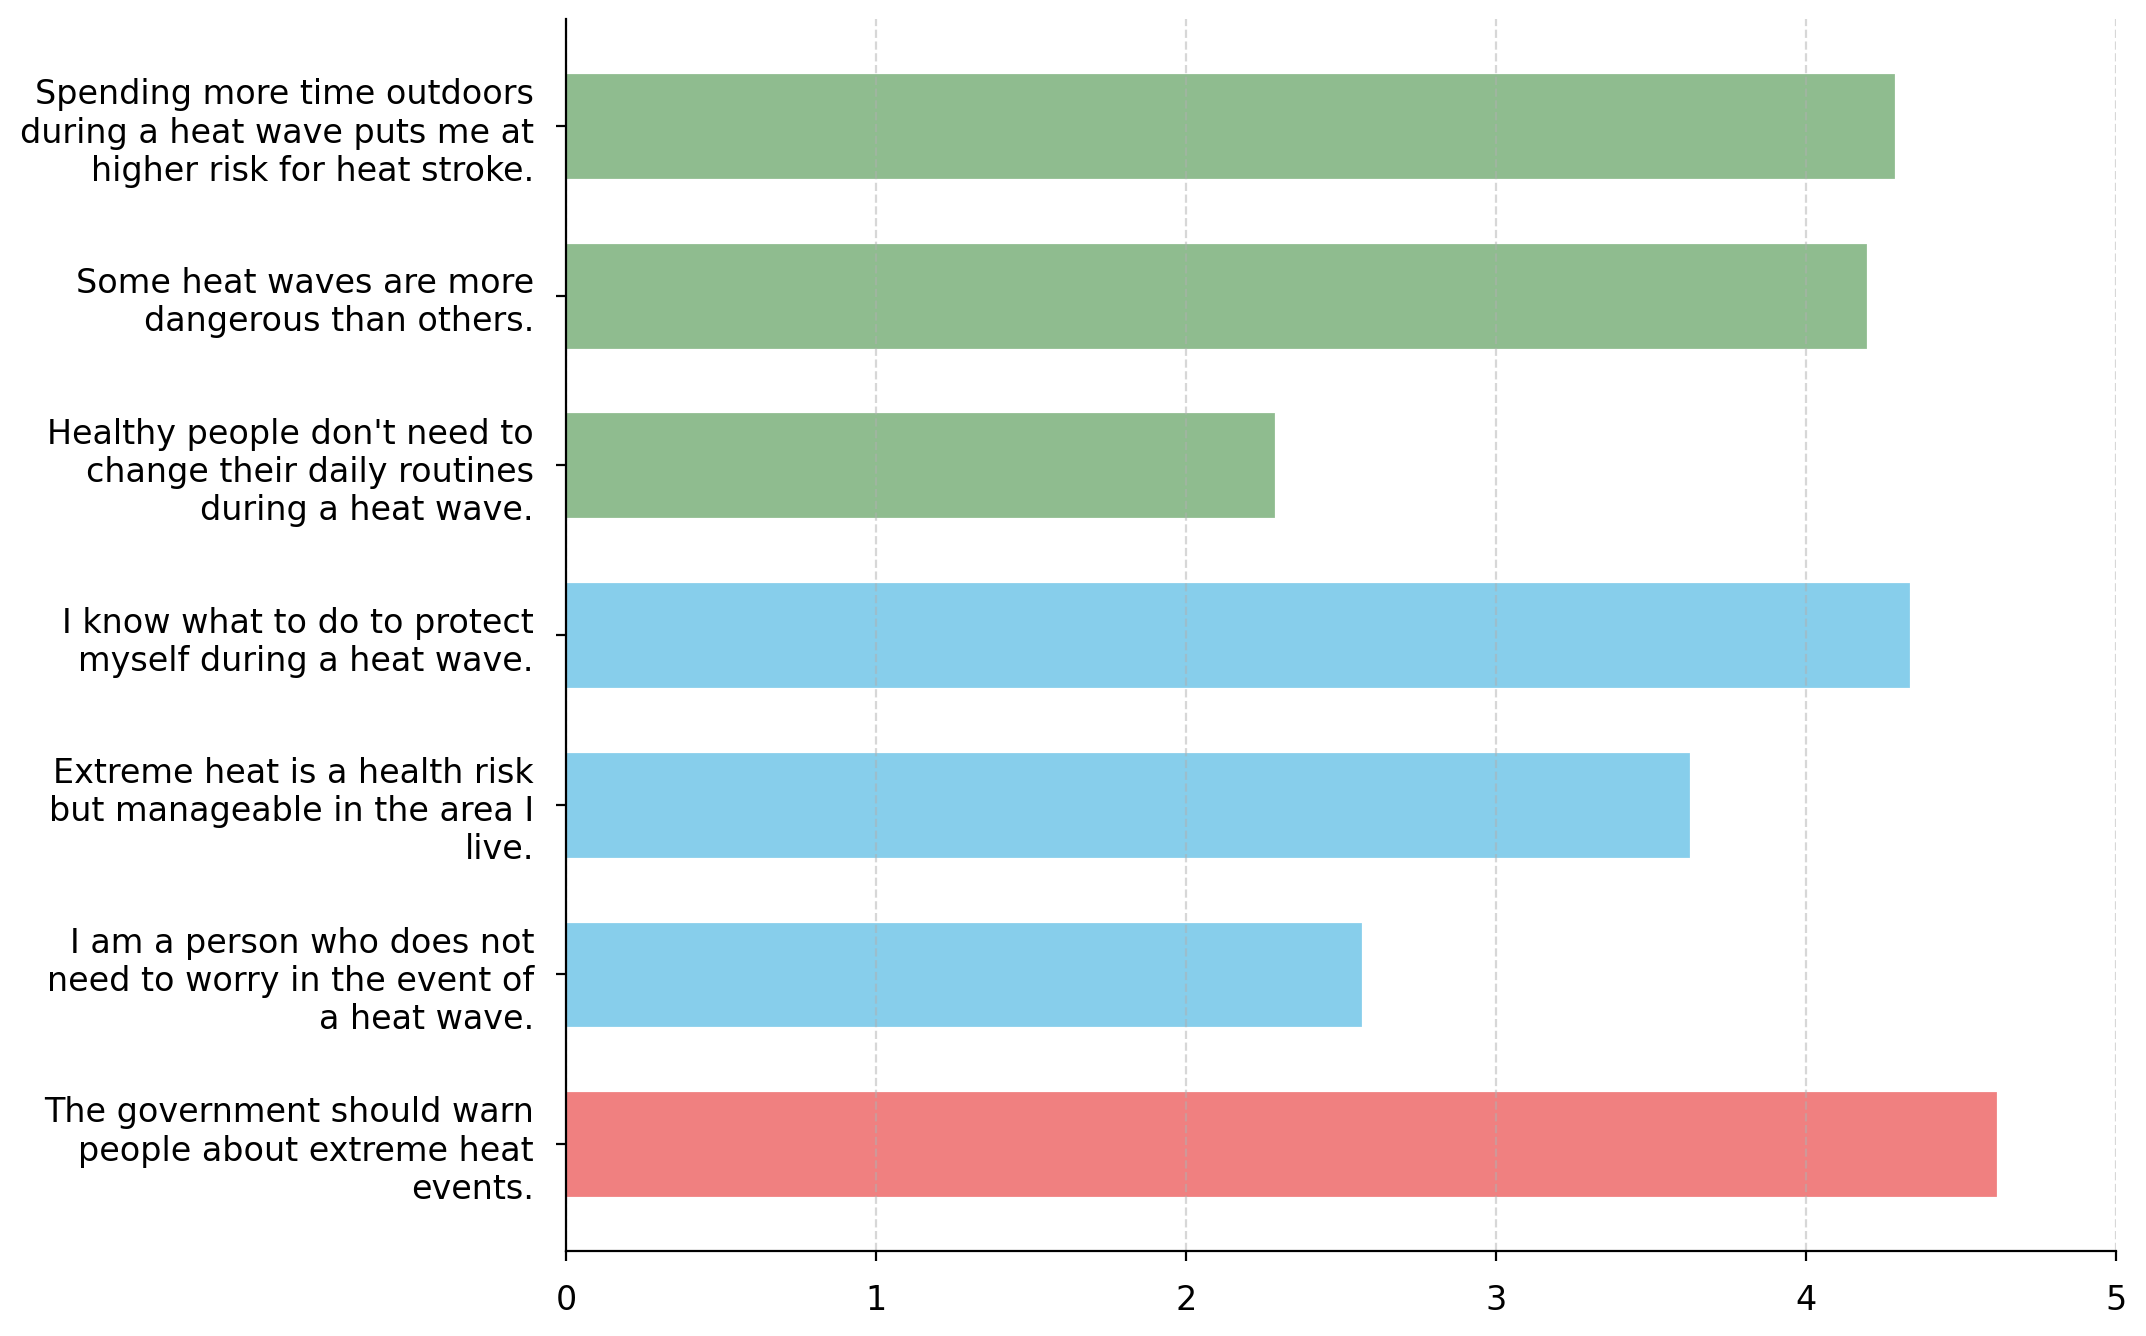

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import text as mtext

# Define the data as a dictionary
data = {
    'Statement': [
        "Spending more time outdoors during a heat wave puts me at higher risk for heat stroke.",
        "Some heat waves are more dangerous than others.",
        "Healthy people don't need to change their daily routines during a heat wave.",
        "I know what to do to protect myself during a heat wave.",
        "Extreme heat is a health risk but manageable in the area I live.",
        "I am a person who does not need to worry in the event of a heat wave.",
        "The government should warn people about extreme heat events."
    ],
    'Mean': [4.28, 4.19, 2.28, 4.33, 3.62, 2.56, 4.61],
    'SD': [1.23, 1, 1.23, 0.74, 1.2, 1.22, 0.75]
}

# Define the desired order of the statements (reversed)
desired_order = [6, 5, 4, 3, 2, 1, 0]

# Define the colors for each group of statements
colors_group1 = ['lightcoral'] * 3  # Last three statements
colors_group2 = ['skyblue'] * 3  # Next three statements
colors_group3 = ['darkseagreen']  # First statement

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Reorder the DataFrame based on the desired order
df_sorted = df.iloc[desired_order].reset_index(drop=True)

# Wrap the statement labels onto two lines
wrapped_labels = [textwrap.wrap(label, 30) for label in df_sorted['Statement']]

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 8), dpi=200)
bars = ax.barh(df_sorted['Statement'], df_sorted['Mean'], height=0.6)

# Convert the tuple to a list
bars = list(bars)

# Assign colors to the bars
bars[0].set_color(colors_group1[0])
for bar in bars[1:4]:
    bar.set_color(colors_group2[0])
for bar in bars[4:]:
    bar.set_color(colors_group3[0])

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add grid lines
ax.grid(axis='x', linestyle='--', alpha=0.5)

# Set the wrapped labels as tick labels
ax.set_yticks(range(len(df_sorted)))
ax.set_yticklabels(['\n'.join(label) for label in wrapped_labels])

# Increase font size
ax.tick_params(axis='y', which='major', pad=8, labelsize=12)
ax.tick_params(axis='x', which='major', pad=8, labelsize=12)

# Set x-axis range to 0-5
ax.set_xlim(0, 5)

plt.show()
